#**COMPARING THE RECOMMENDATION SYSTEM OF LEADING ECOMMERCE WEBSITES AMAZON,BIGBASKET , FLIPKART ON INTEGRATED DATA**



IMPORING THE LIBRARIES AND PACKAGES

In [ ]:

!pip install scrapy
!pip install tabulate

!pip install scrapy\n!pip install tabulate
import os
import logging
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scrapy
from scrapy.crawler import CrawlerProcess
from glob import glob
import glob, os
from ipywidgets import widgets
from IPython.display import display, clear_output
from tabulate import tabulate
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')
CONST_USER_AGENT = 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'

CONST_PRODUCT = 'Product'
CONST_URL = 'Url'
CONST_PLATFORM = 'Platform'

CONST_MAX_PAGE_COUNT = 'Max_Page_Count'
CONST_PRODUCT_NAME = 'Product_Name'
CONST_PRODUCT_COST = 'Product_Cost'

CONST_PRODUCT_BEVERAGES = 'Beverages'
CONST_PRODUCT_BEVERAGES_TEA = 'Tea'
CONST_PRODUCT_BEVERAGES_COFFEE = 'Coffee'
CONST_PRODUCT_GROCERRIES = 'Grocery'
CONST_PRODUCT_MASALA_AND_SPICES = 'Masala & Spices'

CONST_PLATFORM_BIGBASKET = 'BigBasket'
CONST_PLATFORM_AMAZON = 'Amazon'
CONST_PLATFORM_FLIPKART = 'Flipkart'

CONST_DF_FORMAT_CSV = '.csv'
CONST_DF_FORMAT_JSON = '.json'

CONST_NOT_APPLICABLE = 'N/A'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 270 kB 6.5 MB/s 
     |████████████████████████████████| 3.1 MB 38.6 MB/s 
     |████████████████████████████████| 254 kB 58.6 MB/s 
     |████████████████████████████████| 93 kB 2.6 MB/s 
     |████████████████████████████████| 4.1 MB 39.0 MB/s 
     |████████████████████████████████| 57 kB 4.0 MB/s 
     |████████████████████████████████| 74 kB 3.4 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11958 sha256=55d2dde4078b9ae7166f3b85dd6284e5ddf5f6883da1eb8bb32895df22ca1818
  Stored in directory: /root/.cache/pip/wheels/c9/d6/6a/de198d890277cde60ca3dbebe7ae592d3b381c7d9bb2455f4d
Successfully built PyDispatcher
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Invalid requirement: 'scrapyn!pip'


PREPROCESSING AMAZON DATASET

In [ ]:
df_amazon = pd.read_csv("/content/drive/MyDrive/product.csv")
df_amazon.head()

,Unnamed: 0,asin,avg.rating,avg.helpful.ratio,also_bought,also_viewed,brand,categories,description,price,salesRank,title
0,1,7806397051,2.50,NaN,"['B00KR26VFE', 'B00E7LQHZ0', 'B00BMW24TU', 'B00K67AQN8', 'B008GOR6O0', 'B00KVBZAXK', 'B008B2Z94Q', 'B00IIFVJZ4', 'B00FYUX3Z0', 'B00HWR1OZ4', 'B00EYZR3E8', 'B00IHQKRCA', 'B00KS4FDLO', 'B00GBTX1GO', 'B00FYVOG1Y', 'B009WJCEMM', 'B00ID5PRQQ', 'B00IIG7UQ0', 'B0068Y0EXK', 'B00JFLRCOW', 'B009NAE91E', 'B00B4YVU4G', 'B00K48JDWY', 'B006HCJXBM', 'B009VXY05S', 'B00I99OON8', 'B009WI3RZQ', 'B00IJ3LG94', 'B0067F8BBM', 'B002TPQPEE', 'B00IBVE79K', 'B00K05ZR08', 'B00K407VOO', 'B00GMDIKV0', 'B00KWSCOZO', 'B00EL1HZ34', 'B00HKA110G', 'B00KL53KGA', 'B00B8P5CTA', 'B00EYYW2HW', 'B00IKBGQAE', 'B00KHKXPHS', 'B00HPS4664', 'B00I9ZCV6E', 'B00EOFEKF8', 'B00F16KHLA', 'B00L0R8KK4', 'B00G8F2RNE', 'B00942W51C', 'B00KXOLTD0', 'B00DAYGJVW', 'B004X1QY20', 'B00BLDA3J8', 'B00HL9BG9C', 'B00GLM2FAO', 'B00JEGCI6U', 'B00K7P74GQ', 'B004W5RCNM', 'B00JK99BNE', 'B005TKZS76', 'B00E57MCMS', 'B001TK1I4M', 'B00CQ1DKZS', 'B00FORNVGO', 'B00GQU5YY0', 'B00GZIHP3G', 'B00BX7DGIC', 'B004GNMP0U', 'B00DQ2ILQY', 'B00IZZ7RTO', 'B00CBT0TYU', 'B008NQJA5E', 'B0092LDWVW', 'B00HQ8MA70', 'B003QAPTAW', 'B004M7WKKK', 'B00H1SW3RC', 'B008FX7B9M', 'B0061KQEVW', 'B00IIFOEIS', 'B006GTKSHY', 'B00D8U570W', 'B00IQK5K4C', 'B00IZ6KIE4', 'B00FORNYMU', 'B00LAYIFD4', 'B00ACOFN0Q', 'B00BZ4QDW4', 'B005C8MMPQ', '1111306923', 'B006Z5K3FG', 'B0054SIB1S', 'B002UBVZYC', 'B00J921XM4', 'B00CZ4W8UE', 'B00EU89CKC', 'B00J3IFAA0', 'B005O30Q0M']","['B008GOR6O0', 'B00EOFEKF8', 'B00IIFVJZ4', 'B009C7RZNC', 'B00K05ZR08', 'B009NAE9A0', 'B00A66T112', 'B00C8R39TM', 'B009VYF0MY', 'B00K0683R6', 'B004M7WKKK', 'B00K0683OE', 'B008MU8TL2', 'B00HKA110G', 'B00K0683PS', 'B00BMW24TU', 'B0061KQEVW', 'B00E7LQHZ0', 'B00KR26VFE', 'B00IHR9EVE', 'B00IHQKRCA', 'B00GWDKRG6', 'B00DFQOIJA', 'B00GWDZBHQ', 'B002QFGQAK', 'B007RKC27U', 'B00JE46HM8', 'B00IIG7UQ0', 'B009NAE91E', 'B008D5JRL2', 'B00IHR9EV4', 'B00CZ49RSK', 'B00J3HHJUA', 'B009WJCEMM', 'B004I3LU7C', 'B00LE9YL0G', 'B00EYZR3E8', 'B00FQ8OL6U', 'B00L54D9NU', 'B00GBTX1GO', 'B00I9GTBD4', 'B00IVHDGMS', 'B009P732GI', 'B008B2Z94Q', 'B004UO2GMW', 'B00KHOF6V2', 'B008D5D9NY', 'B00IHQQGKM', 'B00AU05YVU', 'B00HWR1OZ4', 'B00K67AQN8', 'B002QFGKUQ', 'B0067F8BBM', 'B00FYVOG1Y']",COKA,"[['Beauty', 'Makeup', 'Face', 'Concealers & Neutralizers']]","An extensive range of 15 multiple vibrant long wear concealer colour with different skin tones to create more than 10,000 amazing looks. Using the most commonly applied shades, ensures the best skin colour match and guarantees a traceless and natural finish. Enabling layering and mixing, provides total camouflage for almost any skin problem including blemishes, scars, birthmarks and black circles. It is also suitable to use as bronzer. The light colour is suitable for redness, acne and so on. The medium colour is perfect for dark shadows in the under-eye area. The dark colour provides exceptional camouflage and adheres well to the skin. Silky glossy colour and high quality ingredients together to care skin around and can last for all day long. It is perfect for Professional Salon, Wedding, Party and Home use. Size: 15.4 x 10.2 x 1.3cm. Each Diameter: 2.6cm. Concealer: 15 Color Concealer.",5.04,{'Beauty': 10486},WAWO 15 Color Professionl Makeup Eyeshadow Camouflage Facial Concealer Neutral Palette
1,2,9759091062,3.09,NaN,"['B0054GLD1U', 'B003BRZCUC', 'B0054GBXOW', 'B006VDOPPQ', 'B005R3IPJI', 'B003BRZ7B6', 'B0074SE5CA', 'B000X5LUYC', 'B009HOU1TU', 'B000VQEQXA', 'B009SIEQ78', 'B002TNIN2S', 'B0074RLEZC', 'B007CMS5C4', 'B0071H5C76', 'B007M8TB08', 'B0072CVZ0S', 'B002SKMNGO', 'B006ZYZ8S4', 'B006V6T1X4', 'B00DJWN0FI', 'B00CZ9RDG8', 'B000OV3ZDO', 'B00H04Z0BI', 'B0089MUOOS', 'B003BS4CUC', 'B00BKFNQI2', 'B000VQEUK4', 'B006ZBP8NM', 'B005JNKXF0', 'B002W23NQ2', 'B00J7RIXEM', 'B005IJTKFY', 'B00886V412', 'B0071H6ZD6', 'B005GMY88W', 'B004RANK5Q', 'B009JJA49U', 'B0071H640U', 'B002UFJ66M', 'B0093HPZ2E', 'B000MQ6X8A', 'B002W01P82', 'B004N56WWI',

In [ ]:
df_amazon['avg.rating'].unique()

array([2.5 , 3.09, 5.  , 4.6 , 4.5 , 4.29, 4.09, 4.  , 4.4 , 3.33, 3.67,
       3.8 , 2.  , 4.75, 3.  , 4.57, 4.55, 4.22, 4.8 , 4.83, 4.33, 3.4 ,
       3.5 , 3.94, 3.63, 4.64, 4.62, 4.08, 4.63, 4.2 , 4.25, 4.67, 3.98,
       2.25, 4.65, 4.19, 3.55, 3.54, 3.88, 3.96, 4.04, 4.17, 4.12, 3.75,
       3.92, 3.95, 4.32, 3.93, 2.67, 3.83, 4.38, 3.56, 3.6 , 4.18, 1.  ,
       3.81, 3.91, 4.23, 4.21, 4.86, 4.3 , 4.41, 3.25, 2.75, 4.35, 4.42,
       4.06, 3.86, 3.71, 4.71, 4.44, 4.36, 4.56, 3.57, 3.62, 3.2 , 4.43,
       3.45, 2.83, 1.5 , 1.67, 4.54, 4.7 , 4.9 , 3.7 , 3.89, 4.15, 4.27,
       4.39, 3.38, 3.14, 3.3 , 4.82, 3.73, 4.26, 3.29, 4.14, 4.95, 4.11,
       3.43, 2.33, 2.38, 3.79, 3.78, 3.69, 3.82, 3.27, 3.85, 4.73, 3.87,
       4.53, 4.69, 2.8 , 4.47, 3.12, 3.76, 4.79, 4.91, 4.46, 3.9 , 4.77,
       4.1 , 4.24, 4.74, 4.37, 3.36, 4.78, 3.42, 4.92, 4.07, 4.59, 2.56,
       4.58, 2.6 , 4.13, 3.77, 4.31, 3.53, 3.58, 4.51, 2.4 , 4.61, 4.88,
       4.45, 3.74, 4.16, 3.46, 3.18, 3.17, 4.34, 3.

In [ ]:
df_amazon.drop(df_amazon[df_amazon['price'] == ''].index, inplace = True)

In [ ]:
df_amazon.dtypes

Unnamed: 0             int64
asin                  object
avg.rating           float64
avg.helpful.ratio    float64
also_bought           object
also_viewed           object
brand                 object
categories            object
description           object
price                float64
salesRank             object
title                 object
dtype: object

In [ ]:
df_amazon['avg.rating'].unique()

array([2.5 , 3.09, 5.  , 4.6 , 4.5 , 4.29, 4.09, 4.  , 4.4 , 3.33, 3.67,
       3.8 , 2.  , 4.75, 3.  , 4.57, 4.55, 4.22, 4.8 , 4.83, 4.33, 3.4 ,
       3.5 , 3.94, 3.63, 4.64, 4.62, 4.08, 4.63, 4.2 , 4.25, 4.67, 3.98,
       2.25, 4.65, 4.19, 3.55, 3.54, 3.88, 3.96, 4.04, 4.17, 4.12, 3.75,
       3.92, 3.95, 4.32, 3.93, 2.67, 3.83, 4.38, 3.56, 3.6 , 4.18, 1.  ,
       3.81, 3.91, 4.23, 4.21, 4.86, 4.3 , 4.41, 3.25, 2.75, 4.35, 4.42,
       4.06, 3.86, 3.71, 4.71, 4.44, 4.36, 4.56, 3.57, 3.62, 3.2 , 4.43,
       3.45, 2.83, 1.5 , 1.67, 4.54, 4.7 , 4.9 , 3.7 , 3.89, 4.15, 4.27,
       4.39, 3.38, 3.14, 3.3 , 4.82, 3.73, 4.26, 3.29, 4.14, 4.95, 4.11,
       3.43, 2.33, 2.38, 3.79, 3.78, 3.69, 3.82, 3.27, 3.85, 4.73, 3.87,
       4.53, 4.69, 2.8 , 4.47, 3.12, 3.76, 4.79, 4.91, 4.46, 3.9 , 4.77,
       4.1 , 4.24, 4.74, 4.37, 3.36, 4.78, 3.42, 4.92, 4.07, 4.59, 2.56,
       4.58, 2.6 , 4.13, 3.77, 4.31, 3.53, 3.58, 4.51, 2.4 , 4.61, 4.88,
       4.45, 3.74, 4.16, 3.46, 3.18, 3.17, 4.34, 3.

In [ ]:
df_amazon[['avg.rating', 'price']] = df_amazon[['avg.rating', 'price']].astype(np.float)
df_amazon['SpecialPrice']  = df_amazon['price']
df_amazon['IsAvailable']  = True
df_amazon['Platform']  = CONST_PLATFORM_AMAZON
df_amazon.columns

Index(['Unnamed: 0', 'asin', 'avg.rating', 'avg.helpful.ratio', 'also_bought',
       'also_viewed', 'brand', 'categories', 'description', 'price',
       'salesRank', 'title', 'SpecialPrice', 'IsAvailable', 'Platform'],
      dtype='object')

In [ ]:
df_amazon.head()

,Unnamed: 0,asin,avg.rating,avg.helpful.ratio,also_bought,also_viewed,brand,categories,description,price,salesRank,title,SpecialPrice,IsAvailable,Platform
0,1,7806397051,2.50,NaN,"['B00KR26VFE', 'B00E7LQHZ0', 'B00BMW24TU', 'B00K67AQN8', 'B008GOR6O0', 'B00KVBZAXK', 'B008B2Z94Q', 'B00IIFVJZ4', 'B00FYUX3Z0', 'B00HWR1OZ4', 'B00EYZR3E8', 'B00IHQKRCA', 'B00KS4FDLO', 'B00GBTX1GO', 'B00FYVOG1Y', 'B009WJCEMM', 'B00ID5PRQQ', 'B00IIG7UQ0', 'B0068Y0EXK', 'B00JFLRCOW', 'B009NAE91E', 'B00B4YVU4G', 'B00K48JDWY', 'B006HCJXBM', 'B009VXY05S', 'B00I99OON8', 'B009WI3RZQ', 'B00IJ3LG94', 'B0067F8BBM', 'B002TPQPEE', 'B00IBVE79K', 'B00K05ZR08', 'B00K407VOO', 'B00GMDIKV0', 'B00KWSCOZO', 'B00EL1HZ34', 'B00HKA110G', 'B00KL53KGA', 'B00B8P5CTA', 'B00EYYW2HW', 'B00IKBGQAE', 'B00KHKXPHS', 'B00HPS4664', 'B00I9ZCV6E', 'B00EOFEKF8', 'B00F16KHLA', 'B00L0R8KK4', 'B00G8F2RNE', 'B00942W51C', 'B00KXOLTD0', 'B00DAYGJVW', 'B004X1QY20', 'B00BLDA3J8', 'B00HL9BG9C', 'B00GLM2FAO', 'B00JEGCI6U', 'B00K7P74GQ', 'B004W5RCNM', 'B00JK99BNE', 'B005TKZS76', 'B00E57MCMS', 'B001TK1I4M', 'B00CQ1DKZS', 'B00FORNVGO', 'B00GQU5YY0', 'B00GZIHP3G', 'B00BX7DGIC', 'B004GNMP0U', 'B00DQ2ILQY', 'B00IZZ7RTO', 'B00CBT0TYU', 'B008NQJA5E', 'B0092LDWVW', 'B00HQ8MA70', 'B003QAPTAW', 'B004M7WKKK', 'B00H1SW3RC', 'B008FX7B9M', 'B0061KQEVW', 'B00IIFOEIS', 'B006GTKSHY', 'B00D8U570W', 'B00IQK5K4C', 'B00IZ6KIE4', 'B00FORNYMU', 'B00LAYIFD4', 'B00ACOFN0Q', 'B00BZ4QDW4', 'B005C8MMPQ', '1111306923', 'B006Z5K3FG', 'B0054SIB1S', 'B002UBVZYC', 'B00J921XM4', 'B00CZ4W8UE', 'B00EU89CKC', 'B00J3IFAA0', 'B005O30Q0M']","['B008GOR6O0', 'B00EOFEKF8', 'B00IIFVJZ4', 'B009C7RZNC', 'B00K05ZR08', 'B009NAE9A0', 'B00A66T112', 'B00C8R39TM', 'B009VYF0MY', 'B00K0683R6', 'B004M7WKKK', 'B00K0683OE', 'B008MU8TL2', 'B00HKA110G', 'B00K0683PS', 'B00BMW24TU', 'B0061KQEVW', 'B00E7LQHZ0', 'B00KR26VFE', 'B00IHR9EVE', 'B00IHQKRCA', 'B00GWDKRG6', 'B00DFQOIJA', 'B00GWDZBHQ', 'B002QFGQAK', 'B007RKC27U', 'B00JE46HM8', 'B00IIG7UQ0', 'B009NAE91E', 'B008D5JRL2', 'B00IHR9EV4', 'B00CZ49RSK', 'B00J3HHJUA', 'B009WJCEMM', 'B004I3LU7C', 'B00LE9YL0G', 'B00EYZR3E8', 'B00FQ8OL6U', 'B00L54D9NU', 'B00GBTX1GO', 'B00I9GTBD4', 'B00IVHDGMS', 'B009P732GI', 'B008B2Z94Q', 'B004UO2GMW', 'B00KHOF6V2', 'B008D5D9NY', 'B00IHQQGKM', 'B00AU05YVU', 'B00HWR1OZ4', 'B00K67AQN8', 'B002QFGKUQ', 'B0067F8BBM', 'B00FYVOG1Y']",COKA,"[['Beauty', 'Makeup', 'Face', 'Concealers & Neutralizers']]","An extensive range of 15 multiple vibrant long wear concealer colour with different skin tones to create more than 10,000 amazing looks. Using the most commonly applied shades, ensures the best skin colour match and guarantees a traceless and natural finish. Enabling layering and mixing, provides total camouflage for almost any skin problem including blemishes, scars, birthmarks and black circles. It is also suitable to use as bronzer. The light colour is suitable for redness, acne and so on. The medium colour is perfect for dark shadows in the under-eye area. The dark colour provides exceptional camouflage and adheres well to the skin. Silky glossy colour and high quality ingredients together to care skin around and can last for all day long. It is perfect for Professional Salon, Wedding, Party and Home use. Size: 15.4 x 10.2 x 1.3cm. Each Diameter: 2.6cm. Concealer: 15 Color Concealer.",5.04,{'Beauty': 10486},WAWO 15 Color Professionl Makeup Eyeshadow Camouflage Facial Concealer Neutral Palette,5.04,True,Amazon
1,2,9759091062,3.09,NaN,"['B0054GLD1U', 'B003BRZCUC', 'B0054GBXOW', 'B006VDOPPQ', 'B005R3IPJI', 'B003BRZ7B6', 'B0074SE5CA', 'B000X5LUYC', 'B009HOU1TU', 'B000VQEQXA', 'B009SIEQ78', 'B002TNIN2S', 'B0074RLEZC', 'B007CMS5C4', 'B0071H5C76', 'B007M8TB08', 'B0072CVZ0S', 'B002SKMNGO', 'B006ZYZ8S4', 'B006V6T1X4', 'B00DJWN0FI', 'B00CZ9RDG8', 'B000OV3ZDO', 'B00H04Z0BI', 'B0089MUOOS', 'B003BS4CUC', 'B00BKFNQI2', 'B000VQEUK4', 'B006ZBP8NM', 'B005JNKXF0', 'B002W23NQ2', 'B00J7RIXEM', 'B005IJTKFY', 'B00886V412', 'B0071H6ZD6', 'B005GMY88W', 'B004RANK5Q', 'B009JJA49U', 'B0071H640U', 'B002UFJ66M', 'B00

In [ ]:
df_amazon.isna().any()

Unnamed: 0           False
asin                 False
avg.rating           False
avg.helpful.ratio     True
also_bought          False
also_viewed          False
brand                 True
categories           False
description           True
price                 True
salesRank            False
title                False
SpecialPrice          True
IsAvailable          False
Platform             False
dtype: bool

In [ ]:
df=df_amazon.dropna(axis=0)

In [ ]:
df

,Unnamed: 0,asin,avg.rating,avg.helpful.ratio,also_bought,also_viewed,brand,categories,description,price,salesRank,title,SpecialPrice,IsAvailable,Platform
21,22,B000052Y25,5.00,1.00,"['B0087GR95S', 'B0088W2E60', 'B0088W7PUK', 'B0085XVQZW', 'B005J398JW', 'B00DNE5YZQ', 'B000G017TC', 'B000XDCGOM', 'B0001EKQRW', 'B006FWZ5CA', 'B0033ZIQVO', 'B0001EKUNC', 'B006UFNH22', 'B005U5KFTG', 'B000LNWUIG', 'B004PCRSYK', 'B003MUSRGY', 'B00DNE664E', 'B004LT9EDU', 'B003MUQOR8', 'B0006FMK98', 'B0000Y3GF2', 'B006IC0LXK', 'B00E8J36FU', 'B003MUNI0E', 'B0088W93LY', 'B0052ZKKWG', 'B000GCW9F6', 'B0033GLYQM', 'B008NB43UQ', 'B0016AVIQS', 'B0028R4SRO', 'B00DE2XKWQ', 'B0088W7Z7S', 'B00HHZALDC', 'B000BI4DDQ', 'B00GO5PEX8', 'B0087GRCL4', 'B00AFCP9FO', 'B002J29FKI', 'B005MT7I5O', 'B0088W7WX0', 'B000ZJ2842', 'B008M8TYU4', 'B00606RORK', 'B004B88BQW', 'B00BARE3SC', 'B002XO4LWE', 'B0064FTVZ0', 'B00008O2X5', 'B003U5XH70', 'B008OSIAFC', 'B003XWG880', 'B002C74898', 'B00FEMSAWO', 'B00A9VX0IY', 'B00ICBW1QK', 'B004J0094Y', 'B0088W8DLA', 'B00BJ8RM7G', 'B0088W8NC4', 'B0088W48NM', 'B00KGGMR4A', 'B00LD8OE3C', 'B001FA1NTG', 'B00JIRRTYG', 'B00J7PLJYA', 'B0016P9Z9A']","['B0088W2E60', 'B000XDCGOM', 'B0087GR95S', 'B0085XVQZW', 'B004PCRSYK', 'B00DNE5YZQ', 'B0088W7PUK', 'B005J398JW', 'B000G017TC', 'B0001EKQRW', 'B003MUSRGY', 'B0088W93LY', 'B0033GLYQM', 'B005VEE58I', 'B000BI4DDQ', 'B0006FMK98', 'B0001EKUNC', 'B006FWZ5CA', 'B000LNWUIG', 'B003MUQOR8', 'B006UFNH22', 'B00DQUJJF8', 'B0033ZIQVO', 'B006IC0LXK', 'B00JRUBZRQ', 'B00164E8TI', 'B0085XVNQO', 'B003MUNI0E', 'B005U5KFTG', 'B001E7211O', 'B008NB43UQ', 'B002XO4LWE', 'B00HHZALDC', 'B00E8J36FU', 'B000GCW9F6', 'B000GD03TO', 'B0052ZKKWG', 'B0000Y3GF2', 'B002KAA8KK', 'B003458J3S', 'B00J7PLJYA', 'B00DNE664E', 'B002J29FKI', 'B005UGVBKC', 'B008M8TYU4', 'B00FEMSAWO', 'B004LT9EDU', 'B0016B9U4O', 'B00J2EKHG2', 'B0088W8NC4', 'B0088W7Z7S', 'B001FOLMP2', 'B00GO5PEX8', 'B00EE18RE2', 'B003U5XH70', 'B0016B5MK0']",DHS,"[['Beauty', 'Hair Care', 'Conditioners']]","DHS Conditioning Rinse is specially formulated for dermatological hair care.DHS Conditioning Rinse helps control static electricity, eliminate tangles, mend split ends and improve elasticity.DHS Conditioning Rinse helps make hair easier to comb and manage while adding luster and body.",10.12,{'Beauty': 8864},DHS Conditioning Rinse With Panthenol 8 fl oz,10.12,True,Amazon
22,23,B000052Y5F,3.00,1.00,"['B0044NANVK', 'B001HSMOEE', 'B000V7VZ3I', 'B000GG850U', 'B008AZQX4Y', 'B00BZF95R8', 'B008B0K0CO', 'B00006K13S', 'B001HSMPAM', 'B00CAWCDBU', 'B003ZTRR6I', 'B000F34TCC', 'B008KNX7QS', 'B000RZTMUW', 'B001LFEUYK', 'B00I79YSUY', 'B000WCPFKQ', 'B001V9QS6O', 'B00839QBOE', 'B001GAOHTI', 'B000UZED0S', 'B008D5KHIY', 'B000GCI8ZG', 'B00269WST4', 'B005WDS5W0', 'B0009XFYSG', 'B002ZG8H8O', 'B00HMCUOD2', 'B000QYNNQ8', 'B004AI9CM0', 'B00260H4HO', 'B0047UT5DW', 'B003840WFS', 'B0057D7ZBM', 'B005C55HPG', 'B001KYVL08', 'B000OT9UNK', 'B0002UDK4Q', 'B000TV59EC', 'B000K2YF1S', 'B000KTB19K', 'B0072CRMHI', 'B005D0DTS2', 'B000VPTHP8', 'B000YHLS8W', 'B000V1LX0O', 'B000GGKQMU', 'B005Y4T5C6', 'B000RMFGGY', 'B002GU5YCQ', 'B001OOLF82', 'B00028N8LI', 'B00BI8OG2Q', 'B00EDR6YB0', 'B001OK1YUA', 'B000EEH80M', 'B00ICBW1QK']","['B001HSMOEE', 'B0044NANVK', 'B008AZQX4Y', 'B003ZTRR6I', 'B001V9QS6O', 'B00K1DV9A6', 'B00CAWCDBU', 'B001HSMPAM', 'B008B0K0CO', 'B008KNX7QS', 'B00JLNGGEQ', 'B00BZF95R8', 'B00006K13S', 'B0016AXN7A', 'B0002UDK4Q', 'B000V7VZ3I', 'B00D6415VK', 'B008BH4WTO', 'B000AMPRBU', 'B004SEHB7Y', 'B0013OW2KS', 'B00013YYKS', 'B001EP3IEA', 'B0077SXI7A', 'B00DYSXWEQ', 'B002RWUNYM', 'B000GG850U', 'B000GWG7TK', 'B001G7R734', 'B0039283FU', 'B008B0MG6W', 'B001G7QVAE', 'B000GCI8ZG', 'B001UQZ6E8', 'B0040IWMTA', 'B0091FABUE', 'B000OTFBNI', 'B00HMCUOD2', 'B000N7DP6G', 'B000GCI90A', 'B0013I4WLG', 'B009XG7WM6', 'B00HWWSGGE', 'B0060L77M2', 'B001PLLWS2', 'B003CT2YQO', 'B00JLWX2XA', 'B001HN77TQ', 'B001TJZIQW', 'B00BOTZ5CE', 'B00IYQY3M8', 'B000MM2RZM', 'B0001CXUKY', 'B0013I1H9G', 'B0013I4WJS', 'B005EKIDG4', 'B004H2YFKI', 'B000UYIQJI', 'B000F34TCC

In [ ]:
df.shape

(720, 15)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
asin                 0
avg.rating           0
avg.helpful.ratio    0
also_bought          0
also_viewed          0
brand                0
categories           0
description          0
price                0
salesRank            0
title                0
SpecialPrice         0
IsAvailable          0
Platform             0
dtype: int64

PREPROCESSING BIGBASKET DATASET

In [ ]:
df_bigbasket =pd.read_csv("/content/drive/MyDrive/BigBasket Products.csv")
df_bigbasket.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,"This Product contains Garlic Oil that is known to help proper digestion, maintain proper cholesterol levels, support cardiovascular and also build immunity. For Beauty tips, tricks & more visit https://bigbasket.blog/"
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), refrigerator safe, dishwasher safe and can also be used for re-heating food and not for cooking. All containers come with airtight lids and a wide variety of attractive colours. Stack these stylish and colourful containers in your kitchen with ease and for a look-good factor."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your mother, sister, in-laws, boss or your friends, this beautiful designer piece wherever placed, is sure to beautify the surroundings Traditional design This type diya has been used for Diwali and All other Festivals for centuries. Sturdy and easy to carry The feet keep it balanced to ensure safety. Wonderful Oil Lamp made in Brass also called as Jyoti. This is a handcrafted piece of Indian brass Deepak."
3,4,Cereal Flip Lid Container/Storage Jar - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,"Multipurpose container with an attractive design and made from food-grade plastic for your hygiene and safety ideal for storing pulses. Grains, spices, and more with easy opening and closing flip-open lid. Strong, durable and transparent body for longevity and easy identification of contents. Multipurpose storage solution for your daily needs stores your everyday food essentials in style with the Nakoda container set. With transparent bodies, you can easily identify your stored items without having to open the lids. These containers are ideal for storing a large variety of items such as food grains, snacks and pulses to sugar, spices, condiments and more. Featuring unique flip-open lids, you can easily open and close this container without any hassles.\nThe Nakoda container is made from high-quality food-grade and BPA-free plastic that is 100% safe for storing food items. You can safely store your food items in this container without worrying about contamination and harmful toxins. As they are constructed using highly durable virgin plastic, this container will last for a long time even with regular use. This container can enhance the overall look of your kitchen decor. Being dishwasher safe, cleaning and maintaining this container is an easy task. You can also use a simple soap solution to manually wash and retain their looks for a long time."
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,"Nivea Creme Soft Soap gives your skin the best care that it must get. The soft bar consists of Vitamins F and Almonds which are really skin gracious and help you get great skin. It provides the skin with moisture and leaves behind flawless and smooth skin. It makes sure that your body is totally free of germs & dirt and at the same time well nourished.For Beauty tips, tricks & more visit https://bigbasket.blog/"


In [ ]:
df_bigbasket['rating'].unique()

array([4.1, 2.3, 3.4, 3.7, 4.4, 3.3, 3.6, 4. , 3.5, 4.3, 2.2, 5. , 3.8,
       4.2, 4.9, 3.9, 1.5, 2.9, 2.6, 3. , 4.5, nan, 1. , 4.6, 4.8, 3.1,
       2. , 1.8, 2.8, 3.2, 4.7, 2.5, 2.4, 2.7, 2.1, 1.7, 1.9, 1.2, 1.3,
       1.4, 1.6])

In [ ]:
df_bigbasket['Category'] = CONST_PRODUCT_BEVERAGES
df_bigbasket['Platform']  = CONST_PLATFORM_BIGBASKET

In [ ]:
df_bigbasket.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description', 'Category',
       'Platform'],
      dtype='object')

In [ ]:

df_bigbasket.dtypes

index             int64
product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
Category         object
Platform         object
dtype: object

In [ ]:
df_bigbasket[df_bigbasket['rating'] != CONST_NOT_APPLICABLE].head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,Category,Platform
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,"This Product contains Garlic Oil that is known to help proper digestion, maintain proper cholesterol levels, support cardiovascular and also build immunity. For Beauty tips, tricks & more visit https://bigbasket.blog/",Beverages,BigBasket
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), refrigerator safe, dishwasher safe and can also be used for re-heating food and not for cooking. All containers come with airtight lids and a wide variety of attractive colours. Stack these stylish and colourful containers in your kitchen with ease and for a look-good factor.",Beverages,BigBasket
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your mother, sister, in-laws, boss or your friends, this beautiful designer piece wherever placed, is sure to beautify the surroundings Traditional design This type diya has been used for Diwali and All other Festivals for centuries. Sturdy and easy to carry The feet keep it balanced to ensure safety. Wonderful Oil Lamp made in Brass also called as Jyoti. This is a handcrafted piece of Indian brass Deepak.",Beverages,BigBasket
3,4,Cereal Flip Lid Container/Storage Jar - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,"Multipurpose container with an attractive design and made from food-grade plastic for your hygiene and safety ideal for storing pulses. Grains, spices, and more with easy opening and closing flip-open lid. Strong, durable and transparent body for longevity and easy identification of contents. Multipurpose storage solution for your daily needs stores your everyday food essentials in style with the Nakoda container set. With transparent bodies, you can easily identify your stored items without having to open the lids. These containers are ideal for storing a large variety of items such as food grains, snacks and pulses to sugar, spices, condiments and more. Featuring unique flip-open lids, you can easily open and close this container without any hassles.\nThe Nakoda container is made from high-quality food-grade and BPA-free plastic that is 100% safe for storing food items. You can safely store your food items in this container without worrying about contamination and harmful toxins. As they are constructed using highly durable virgin plastic, this container will last for a long time even with regular use. This container can enhance the overall look of your kitchen decor. Being dishwasher safe, cleaning and maintaining this container is an easy task. You can also use a simple soap solution to manually wash and retain their looks for a long time.",Beverages,BigBasket
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,"Nivea Creme Soft Soap gives your skin the best care that it must get. The soft bar consists of Vitamins F and Almonds which are really skin gracious and help you get great skin. It provides the skin with moisture and leaves behind flawless and smooth skin. It makes sure that your body is totally free of germs & dirt and at the same time well nourished.For Beauty tips, tricks & more visit https://bigbasket.blog/",Beverages,BigBasket


PREPROCESSING FLIPKART DATASET

In [ ]:
df_flipkart = pd.read_csv("/content/drive/MyDrive/flipkart_com-ecommerce_sample.csv")
df_flipkart.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                                                                             product_url  \
0    http://www.flipkart.com/alisha-solid-women-s-cycling-shorts/p/itmeh2ffvzetthbb?pid=SRTEH2FF9KEDEFGF   
1    http://www.flipkart.com/fabhomedecor-fabric-double-sofa-bed/p/itmeh3qgfamccfpy?pid=SBEEH3QGU7MFYJFY   
2                             http://www.flipkart.com/aw-bellies/p/itmeh4grgfbkexnt?pid=SHOEH4GRSUBJGZXE   
3    http://www.flipkart.com/alisha-solid-women-s-cycling-shorts/p/itmeh2f6sdgah2pq?pid=SRTEH2F6HUZMQ6SJ   
4  http://www.flipkart.com/sicons-all-purpose-arnica-dog-shampoo/p/itmeh3zyw2vhgsp5?pid=PSOEH3ZYDMSYARJ5   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

                                                                                                              product_category_tree  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women's Cycling Shorts"]   
1               ["Furniture >> Living Room Furniture >> Sofa Beds & Futons >> FabHomeDecor Fabric Double Sofa Bed (Finish Colo..."]   
2                                                                      ["Footwear >> Women's Footwear >> Ballerinas >> AW Bellies"]   
3  ["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women's Cycling Shorts"]   
4                     ["Pet Supplies >> Grooming >> Skin & Coat Care >> Shampoo >> Sicons All Purpose Arnica Dog Shampoo (500 ml)"]   

                pid  retail_price  discounted_price  \
0  SRTEH2FF9KEDEFGF         999.0             379.0   
1  SBEEH3QGU7MFYJFY       32157.0           22646.0   
2  SHOEH4GRSUBJGZXE         999.0             499.0   
3  SRTEH2F6HUZMQ6SJ         699.0             267.0   
4  PSOEH3ZYDMSYARJ5         220.0             210.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         image  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ["http://img5a.flixcart.com/image/short/u/4/a/altht-3p-21-alisha-38-original-imaeh2d5vm5zbtgg.jpeg", "http://img5a.flixcart.com/image/short/p/j/z/altght4p-26-alisha-38-original-imaeh2d5kbufss6n.jpeg", "http://img5a.flixcart.com/image/short/p/j/

In [ ]:
df_flipkart.shape

(20000, 15)

In [ ]:
df_flipkart['Platform']  = CONST_PLATFORM_FLIPKART

In [ ]:
df_flipkart.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'Platform'],
      dtype='object')

#COMBINING ALL THE PLATFORM DATA TOGETHER

In [ ]:
df_all_platforms = pd.concat([df_amazon, df_bigbasket, df_flipkart], axis=0)
df_all_platforms.columns

Index(['Unnamed: 0', 'asin', 'avg.rating', 'avg.helpful.ratio', 'also_bought',
       'also_viewed', 'brand', 'categories', 'description', 'price',
       'salesRank', 'title', 'SpecialPrice', 'IsAvailable', 'Platform',
       'index', 'product', 'category', 'sub_category', 'sale_price',
       'market_price', 'type', 'rating', 'Category', 'uniq_id',
       'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'product_rating', 'overall_rating',
       'product_specifications'],
      dtype='object')

In [ ]:
df_all_platforms.dtypes

Unnamed: 0                 float64
asin                        object
avg.rating                 float64
avg.helpful.ratio          float64
also_bought                 object
also_viewed                 object
brand                       object
categories                  object
description                 object
price                      float64
salesRank                   object
title                       object
SpecialPrice               float64
IsAvailable                 object
Platform                    object
index                      float64
product                     object
category                    object
sub_category                object
sale_price                 float64
market_price               float64
type                        object
rating                     float64
Category                    object
uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tre

In [ ]:

df_all_platforms['SpecialPrice'] = df_all_platforms['SpecialPrice'].replace(',', '', regex=True)
df_all_platforms['avg.rating'] = df_all_platforms['avg.rating'].replace(CONST_NOT_APPLICABLE , 0, regex=True)

df_all_platforms['rating'] = df_all_platforms['rating'].replace(CONST_NOT_APPLICABLE , 0, regex=True)
df_all_platforms[['rating']] = df_all_platforms[['rating']].astype(np.float)
df_all_platforms[['avg.rating']] = df_all_platforms[['avg.rating']].astype(np.float)
df_all_platforms.dtypes

Unnamed: 0                 float64
asin                        object
avg.rating                 float64
avg.helpful.ratio          float64
also_bought                 object
also_viewed                 object
brand                       object
categories                  object
description                 object
price                      float64
salesRank                   object
title                       object
SpecialPrice               float64
IsAvailable                 object
Platform                    object
index                      float64
product                     object
category                    object
sub_category                object
sale_price                 float64
market_price               float64
type                        object
rating                     float64
Category                    object
uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tre

In [ ]:
df_all_platforms.to_csv('df_all_platforms.csv', index=False)
df_all_platforms[df_all_platforms['Platform'] == CONST_PLATFORM_AMAZON ].head()

,Unnamed: 0,asin,avg.rating,avg.helpful.ratio,also_bought,also_viewed,brand,categories,description,price,...,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,product_rating,overall_rating,product_specifications
0,1.0,7806397051,2.50,NaN,"['B00KR26VFE', 'B00E7LQHZ0', 'B00BMW24TU', 'B00K67AQN8', 'B008GOR6O0', 'B00KVBZAXK', 'B008B2Z94Q', 'B00IIFVJZ4', 'B00FYUX3Z0', 'B00HWR1OZ4', 'B00EYZR3E8', 'B00IHQKRCA', 'B00KS4FDLO', 'B00GBTX1GO', 'B00FYVOG1Y', 'B009WJCEMM', 'B00ID5PRQQ', 'B00IIG7UQ0', 'B0068Y0EXK', 'B00JFLRCOW', 'B009NAE91E', 'B00B4YVU4G', 'B00K48JDWY', 'B006HCJXBM', 'B009VXY05S', 'B00I99OON8', 'B009WI3RZQ', 'B00IJ3LG94', 'B0067F8BBM', 'B002TPQPEE', 'B00IBVE79K', 'B00K05ZR08', 'B00K407VOO', 'B00GMDIKV0', 'B00KWSCOZO', 'B00EL1HZ34', 'B00HKA110G', 'B00KL53KGA', 'B00B8P5CTA', 'B00EYYW2HW', 'B00IKBGQAE', 'B00KHKXPHS', 'B00HPS4664', 'B00I9ZCV6E', 'B00EOFEKF8', 'B00F16KHLA', 'B00L0R8KK4', 'B00G8F2RNE', 'B00942W51C', 'B00KXOLTD0', 'B00DAYGJVW', 'B004X1QY20', 'B00BLDA3J8', 'B00HL9BG9C', 'B00GLM2FAO', 'B00JEGCI6U', 'B00K7P74GQ', 'B004W5RCNM', 'B00JK99BNE', 'B005TKZS76', 'B00E57MCMS', 'B001TK1I4M', 'B00CQ1DKZS', 'B00FORNVGO', 'B00GQU5YY0', 'B00GZIHP3G', 'B00BX7DGIC', 'B004GNMP0U', 'B00DQ2ILQY', 'B00IZZ7RTO', 'B00CBT0TYU', 'B008NQJA5E', 'B0092LDWVW', 'B00HQ8MA70', 'B003QAPTAW', 'B004M7WKKK', 'B00H1SW3RC', 'B008FX7B9M', 'B0061KQEVW', 'B00IIFOEIS', 'B006GTKSHY', 'B00D8U570W', 'B00IQK5K4C', 'B00IZ6KIE4', 'B00FORNYMU', 'B00LAYIFD4', 'B00ACOFN0Q', 'B00BZ4QDW4', 'B005C8MMPQ', '1111306923', 'B006Z5K3FG', 'B0054SIB1S', 'B002UBVZYC', 'B00J921XM4', 'B00CZ4W8UE', 'B00EU89CKC', 'B00J3IFAA0', 'B005O30Q0M']","['B008GOR6O0', 'B00EOFEKF8', 'B00IIFVJZ4', 'B009C7RZNC', 'B00K05ZR08', 'B009NAE9A0', 'B00A66T112', 'B00C8R39TM', 'B009VYF0MY', 'B00K0683R6', 'B004M7WKKK', 'B00K0683OE', 'B008MU8TL2', 'B00HKA110G', 'B00K0683PS', 'B00BMW24TU', 'B0061KQEVW', 'B00E7LQHZ0', 'B00KR26VFE', 'B00IHR9EVE', 'B00IHQKRCA', 'B00GWDKRG6', 'B00DFQOIJA', 'B00GWDZBHQ', 'B002QFGQAK', 'B007RKC27U', 'B00JE46HM8', 'B00IIG7UQ0', 'B009NAE91E', 'B008D5JRL2', 'B00IHR9EV4', 'B00CZ49RSK', 'B00J3HHJUA', 'B009WJCEMM', 'B004I3LU7C', 'B00LE9YL0G', 'B00EYZR3E8', 'B00FQ8OL6U', 'B00L54D9NU', 'B00GBTX1GO', 'B00I9GTBD4', 'B00IVHDGMS', 'B009P732GI', 'B008B2Z94Q', 'B004UO2GMW', 'B00KHOF6V2', 'B008D5D9NY', 'B00IHQQGKM', 'B00AU05YVU', 'B00HWR1OZ4', 'B00K67AQN8', 'B002QFGKUQ', 'B0067F8BBM', 'B00FYVOG1Y']",COKA,"[['Beauty', 'Makeup', 'Face', 'Concealers & Neutralizers']]","An extensive range of 15 multiple vibrant long wear concealer colour with different skin tones to create more than 10,000 amazing looks. Using the most commonly applied shades, ensures the best skin colour match and guarantees a traceless and natural finish. Enabling layering and mixing, provides total camouflage for almost any skin problem including blemishes, scars, birthmarks and black circles. It is also suitable to use as bronzer. The light colour is suitable for redness, acne and so on. The medium colour is perfect for dark shadows in the under-eye area. The dark colour provides exceptional camouflage and adheres well to the skin. Silky glossy colour and high quality ingredients together to care skin around and can last for all day long. It is perfect for Professional Salon, Wedding, Party and Home use. Size: 15.4 x 10.2 x 1.3cm. Each Diameter: 2.6cm. Concealer: 15 Color Concealer.",5.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,9759091062,3.09,NaN,"['B0054GLD1U', 'B003BRZCUC', 'B0054GBXOW', 'B006VDOPPQ', 'B005R3IPJI', 'B003BRZ7B6', 'B0074SE5CA', 'B000X5LUYC', 'B009HOU1TU', 'B000VQEQXA', 'B009SIEQ78', 'B002TNIN2S', 'B0074RLEZC', 'B007CMS5C4', 'B0071H5C76', 'B007M8TB08', 'B0072CVZ0S', 'B002SKMNGO', 'B006ZYZ8S4', 'B006V6T1X4', 'B00DJWN0FI', 'B00CZ9RDG8', 'B000OV3ZDO', 'B00H04Z0BI', 'B0089MUOOS', 'B003BS4CUC', 'B00BKFNQI2', 'B000VQEUK4', 'B006ZBP8NM', 'B005JNKXF0', 'B002W23NQ2', 'B00J7RIXEM', 'B005IJTKFY', 'B00886V412', 'B0071H6ZD6', 'B005GMY88W', 'B004RANK5Q', 'B009JJA49U', 

In [ ]:
df_all_platforms[df_all_platforms['Platform'] == CONST_PLATFORM_BIGBASKET ].head()

,Unnamed: 0,asin,avg.rating,avg.helpful.ratio,also_bought,also_viewed,brand,categories,description,price,...,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,product_rating,overall_rating,product_specifications
0,NaN,NaN,NaN,NaN,NaN,NaN,Sri Sri Ayurveda,NaN,"This Product contains Garlic Oil that is known to help proper digestion, maintain proper cholesterol levels, support cardiovascular and also build immunity. For Beauty tips, tricks & more visit https://bigbasket.blog/",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Mastercook,NaN,"Each product is microwave safe (without lid), refrigerator safe, dishwasher safe and can also be used for re-heating food and not for cooking. All containers come with airtight lids and a wide variety of attractive colours. Stack these stylish and colourful containers in your kitchen with ease and for a look-good factor.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Trm,NaN,"A perfect gift for all occasions, be it your mother, sister, in-laws, boss or your friends, this beautiful designer piece wherever placed, is sure to beautify the surroundings Traditional design This type diya has been used for Diwali and All other Festivals for centuries. Sturdy and easy to carry The feet keep it balanced to ensure safety. Wonderful Oil Lamp made in Brass also called as Jyoti. This is a handcrafted piece of Indian brass Deepak.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Nakoda,NaN,"Multipurpose container with an attractive design and made from food-grade plastic for your hygiene and safety ideal for storing pulses. Grains, spices, and more with easy opening and closing flip-open lid. Strong, durable and transparent body for longevity and easy identification of contents. Multipurpose storage solution for your daily needs stores your everyday food essentials in style with the Nakoda container set. With transparent bodies, you can easily identify your stored items without having to open the lids. These containers are ideal for storing a large variety of items such as food grains, snacks and pulses to sugar, spices, condiments and more. Featuring unique flip-open lids, you can easily open and close this container without any hassles.\nThe Nakoda container is made from high-quality food-grade and BPA-free plastic that is 100% safe for storing food items. You can safely store your food items in this container without worrying about contamination and harmful toxins. As they are constructed using highly durable virgin plastic, this container will last for a long time even with regular use. This container can enhance the overall look of your kitchen decor. Being dishwasher safe, cleaning and maintaining this container is an easy task. You can also use a simple soap solution to manually wash and retain their looks for a long time.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Nivea,NaN,"Nivea Creme Soft Soap gives your skin the best care that it must get. The soft bar consists of Vitamins F and Almonds which are really skin gracious and help you get great skin. It provides the skin with moisture and leaves behind flawless and smooth skin. It makes sure that your body is totally free of germs & dirt and at the same time well nourished.For Beauty tips, tricks & more visit https://bigbasket.blog/",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_all_platforms[df_all_platforms['Platform'] == CONST_PLATFORM_FLIPKART ].head()

Unnamed: 0 asin  avg.rating  avg.helpful.ratio also_bought also_viewed  \
0         NaN  NaN         NaN                NaN         NaN         NaN   
1         NaN  NaN         NaN                NaN         NaN         NaN   
2         NaN  NaN         NaN                NaN         NaN         NaN   
3         NaN  NaN         NaN                NaN         NaN         NaN   
4         NaN  NaN         NaN                NaN         NaN         NaN   

          brand categories  \
0        Alisha        NaN   
1  FabHomeDecor        NaN   
2            AW        NaN   
3        Alisha        NaN   
4        Sicons        NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

DATA ANALYSIS ON INTEGRATED DATA

In [ ]:
df_all_platforms.shape

(58901, 37)

In [ ]:
df_all_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58901 entries, 0 to 19999
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               11346 non-null  float64
 1   asin                     11346 non-null  object 
 2   avg.rating               11346 non-null  float64
 3   avg.helpful.ratio        792 non-null    float64
 4   also_bought              11346 non-null  object 
 5   also_viewed              11346 non-null  object 
 6   brand                    53020 non-null  object 
 7   categories               11346 non-null  object 
 8   description              58102 non-null  object 
 9   price                    10941 non-null  float64
 10  salesRank                11346 non-null  object 
 11  title                    11346 non-null  object 
 12  SpecialPrice             10941 non-null  float64
 13  IsAvailable              11346 non-null  object 
 14  Platform              

In [ ]:
df_all_platforms.describe()

,Unnamed: 0,avg.rating,avg.helpful.ratio,price,SpecialPrice,index,sale_price,market_price,rating,retail_price,discounted_price
count,11346.000000,11346.000000,792.000000,10941.000000,10941.000000,27555.00000,27555.000000,27555.000000,18929.000000,19922.000000,19922.000000
mean,5673.500000,4.163377,0.736503,16.617354,16.617354,13778.00000,322.514808,382.056664,3.943410,2979.206104,1973.401767
std,3275.452411,0.770957,0.319704,19.305909,19.305909,7954.58767,486.263116,581.730717,0.739063,9009.639341,7333.586040
min,1.000000,1.000000,0.000000,0.010000,0.010000,1.00000,2.450000,3.000000,1.000000,35.000000,35.000000
25%,2837.250000,3.800000,0.500000,6.680000,6.680000,6889.50000,95.000000,100.000000,3.700000,666.000000,350.000000
50%,5673.500000,4.330000,0.860000,11.590000,11.590000,13778.00000,190.000000,220.000000,4.100000,1040.000000,550.000000
75%,8509.750000,4.750000,1.000000,20.000000,20.000000,20666.50000,359.000000,425.000000,4.300000,1999.000000,999.000000
max,11346.000000,5.000000,1.000000,499.000000,499.000000,27555.00000,12500.000000,12500.000000,5.000000,571230.000000,571230.000000


In [ ]:
df_all_platforms.sample(10)

,Unnamed: 0,asin,avg.rating,avg.helpful.ratio,also_bought,also_viewed,brand,categories,description,price,...,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,product_rating,overall_rating,product_specifications
13945,NaN,NaN,NaN,NaN,NaN,NaN,Kodai Cheese,NaN,"Per 100 gm - Protein - 27 gm, Vitamin A - 14%, Vitamin C - 0 %, Calcium - 0.67%",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14660,NaN,NaN,NaN,NaN,NaN,NaN,Barbican,NaN,"A pomegranate flavoured (non-alcoholic) malt beverage. Barbican is made with the finest ingredients for a delicious taste. It's aromatic and the sparkling clean pomegranate taste is perfect to refresh yourself in style. Popular among the youth, Barbican is one of the leading malt beverage brands in Saudi Arabia and is also produced in the UAE. Barbican is an alcohol free beer with the refreshing and fruity notes with soft malty body resulting into brewing a great-tasting 0.0% alcohol beer.It is delicious and wonderfully refreshing malt beverage, as it is crafted with the finest ingredients. Along with being alcohol-free, easy to use and carry, it has a unique refreshing pomegranate flavoured and is very easy to use as it comes in a can.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5170,NaN,NaN,NaN,NaN,NaN,NaN,Woodino Handicrafts,NaN,Buy Woodino Handicrafts Showpiece - 6.5 cm for Rs.399 online. Woodino Handicrafts Showpiece - 6.5 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.,NaN,...,Woodino Handicrafts Showpiece - 6.5 cm,"[""Home Decor & Festive Needs >> Showpieces >> Woodino Handicrafts Showpieces""]",SHIE2CAJP6XBWPU2,749.0,399.0,"[""http://img5a.flixcart.com/image/showpiece-figurine/p/u/2/whsf3387-woodino-handicrafts-1100x1100-imae26f6cut2z8fg.jpeg"", ""http://img5a.flixcart.com/image/showpiece-figurine/p/u/2/whsf3387-woodino-handicrafts-original-imae26f6cut2z8fg.jpeg""]",False,5,5,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Woodino Handicrafts""}, {""key""=>""Model Number"", ""value""=>""Whsf3387""}, {""key""=>""Shade"", ""value""=>""Brown""}, {""key""=>""Type"", ""value""=>""Ethnic""}, {""key""=>""Material"", ""value""=>""Wooden""}, {""key""=>""Purpose"", ""value""=>""Show Piece""}, {""key""=>""Color"", ""value""=>""Brown""}, {""key""=>""Weight"", ""value""=>""180 g""}, {""key""=>""Height"", ""value""=>""6.5 cm""}, {""key""=>""Width"", ""value""=>""15.5 cm""}, {""key""=>""Sales Package"", ""value""=>""1 Showpiece Figurine""}, {""key""=>""Pack of"", ""value""=>""1""}, {""key""=>""Water Resistant"", ""value""=>""No""}, {""key""=>""Wall Mount"", ""value""=>""No""}]}"
5809,5810.0,B003TDZFVE,4.00,NaN,"['B008Z74UP6', 'B003HHCXR6', 'B0033EN18I', 'B00BPDFQK0', 'B008NDVHTY', 'B00D3KROQC', 'B003VILJPI', 'B00BTFKGNG', 'B003SBO6IA', 'B003SBMKQ0', 'B002KMXO36', 'B003TE3E4I', 'B00BMUXQ6W', 'B00K3VHJXM', 'B0091W9NDI', 'B00L0YV3EC', 'B002P9QPIU', 'B00ITKRNSK', 'B00LVSN232', 'B003TDM2EW', 'B003O4BWV0', 'B00L24E3MY', 'B00LFO6H9S', 'B005CYJB0E', 'B006L1DNWY', 'B005EHHWPA', 'B00IWTPTGQ', 'B00CTSRRM0', 'B002G3K1TY', 'B00L0ZOXW0', 'B00FS66MRQ', 'B0018BTCZO', 'B00GZFXOO8', 'B008F8SRVI', 'B004F949V8', 'B000O3BDHW', 'B00C6A99MM', 'B00FS01P9C', 'B00163NK9I', 'B005H955YK', 'B00IVF1O9W', 'B001DDLNWM', 'B005BF1M10', 'B00HTYCK9O', 'B000ZV0D9W', 'B002G3K1UI', 'B000YQHHE2', 'B002N84OD6', 'B00HQBNDFU', 'B009QAJYES', 'B00CTSUFX8', 'B00IYNT84Y', 'B005EHID3U', 'B00EPW1QRA', 'B004ZT0SSG', 'B008AHWN3W', 'B0032H2FWO', 'B002ED0JDO', 'B00IXGQ1UG', 'B00KARPABW', 'B00AN44OKA', 'B00HMY5DDQ', 'B00IVHH6K6', 'B002MZ8BK2', 'B00A6O1BTE', 'B00IYP0J2W', 'B0076D1YF4', 'B00LT0UVCM', 'B002ED2LQC', 'B00AMQWQJA', 'B00A2Y02TI', 'B001GMN7K6', 'B00GHNOQ54', 'B00JEVPJRA', 'B001GF7W0Y', 'B00AFUWU9O', 'B003ZWX6TM', 'B00BEWTPK4', 'B0052FZORC', 'B008A3WGTM', 'B00JM9JFGA', 'B0002SGSNI', 'B009NCM6JY', 'B009YWWG5M', 'B003GMS8NK', 'B00CSTTRKA', 'B000PQDKU6', 'B005GMYPJ4', 'B00ICH551C', 'B00150LT40', 'B000GCNCUW', 'B00EL5S0RU', 'B00

VISUALIZATION ON DATASET

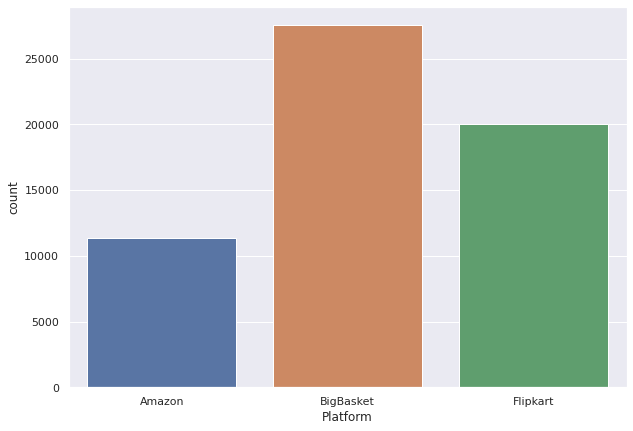

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.set()
ax = sns.countplot(x="Platform", data=df_all_platforms)

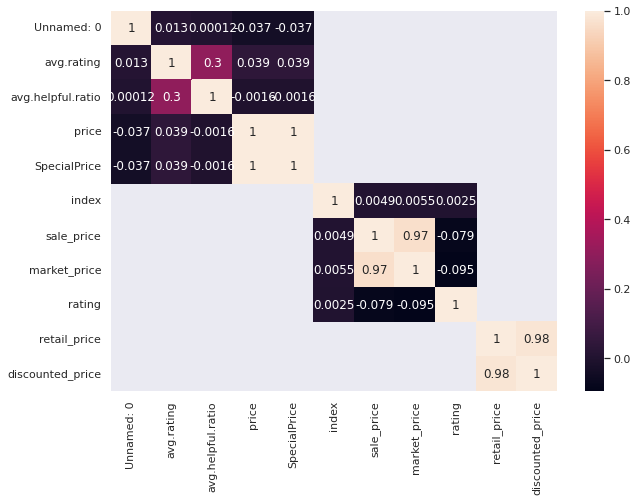

In [ ]:
corr = df_all_platforms.corr()
fig = plt.figure(figsize=(10,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [ ]:
df_all_platforms.isna().any()

Unnamed: 0                  True
asin                        True
avg.rating                  True
avg.helpful.ratio           True
also_bought                 True
also_viewed                 True
brand                       True
categories                  True
description                 True
price                       True
salesRank                   True
title                       True
SpecialPrice                True
IsAvailable                 True
Platform                   False
index                       True
product                     True
category                    True
sub_category                True
sale_price                  True
market_price                True
type                        True
rating                      True
Category                    True
uniq_id                     True
crawl_timestamp             True
product_url                 True
product_name                True
product_category_tree       True
pid                         True
retail_pri

In [ ]:
df_all_platforms.isna().sum()

Unnamed: 0                 47555
asin                       47555
avg.rating                 47555
avg.helpful.ratio          58109
also_bought                47555
also_viewed                47555
brand                       5881
categories                 47555
description                  799
price                      47960
salesRank                  47555
title                      47555
SpecialPrice               47960
IsAvailable                47555
Platform                       0
index                      31346
product                    31347
category                   31346
sub_category               31346
sale_price                 31346
market_price               31346
type                       31346
rating                     39972
Category                   31346
uniq_id                    38901
crawl_timestamp            38901
product_url                38901
product_name               38901
product_category_tree      38901
pid                        38901
retail_pri

In [ ]:
df_all_platforms.isna().sum().sum()

1385331

RECOMMENDATION SYSTEM FOR THE INTEGRATED DATASET

In [ ]:
def search(sender):
    ''' recomending user based on special price and ratings. '''
    search_item = sender.value.lower()
    df_filtered = df_all_platforms[df_all_platforms['product_name'].astype(str)\
                   .str.contains(search_item)].sort_values(by=['SpecialPrice'], ascending=[True])\
                .groupby(by=['Platform']).first()
    df = df_filtered.sort_values(by=['rating'], ascending=[False]).copy()
    df.reset_index(inplace=True)
    df_top_product = df.iloc[1]
    msg = str.format('Recommended Platform : {0}', df_top_product.Platform)
    print(tabulate([[msg]], tablefmt='fancy_grid'))
    display(df)
    display(df[['Platform','rating']].head(4).style.hide_index().highlight_max(color='lightgreen'))
    fig = plt.figure(figsize=(10,7))
    ax = sns.barplot(x="Platform", y="SpecialPrice", data=df, capsize=.2)
# recommending basedon price and ratings
text = widgets.Text()
print(tabulate([['Type the product name in below box and press enter to search.']], tablefmt='grid'))
display(text)
text.on_submit(search)

+---------------------------------------------------------------+
| Type the product name in below box and press enter to search. |
+---------------------------------------------------------------+


Text(value='')